# Purpose: analyse results from idSeq

Steps:

1. read in files
2. add nt mapping and nr mapping reads
3. combine samples into one table [outside merge]
4. reduce to all not eukaryota
5. save

In [14]:
%pwd
%ls c:\Users\Seth\Documents\GitHub\JemimaWestern\WesternIDseq\jemimamasterssb_1454\*.csv | head

Volume in drive C is OS
 Volume Serial Number is 38F6-584E

 Directory of c:\Users\Seth\Box\gitHub\WellcomeAnalysisRNAseq\idSeqResults\vsWater_Sample_Taxon_Reports-07-22-2020_03-02-01pm\wellcomepriming_1099

22/07/2020  03:01 pm           177,810 A11_56650_taxon_report.csv
22/07/2020  03:01 pm           215,694 A12_56656_taxon_report.csv
22/07/2020  03:01 pm           178,677 A4_56649_taxon_report.csv
22/07/2020  03:01 pm           234,274 A6_56664_taxon_report.csv
22/07/2020  03:01 pm           304,664 A8_56660_taxon_report.csv
22/07/2020  03:01 pm           159,774 A9_56667_taxon_report.csv
22/07/2020  03:00 pm           263,039 B1_56632_taxon_report.csv
22/07/2020  03:01 pm           247,098 B10_56659_taxon_report.csv
22/07/2020  03:01 pm           212,755 B2_56671_taxon_report.csv
22/07/2020  03:01 pm           188,147 B4_56641_taxon_report.csv
22/07/2020  03:01 pm           232,278 B5_56670_taxon_report.csv
22/07/2020  03:00 pm           221,539 B7_56626_taxon_report.csv
22/07/202

In [90]:
import pandas as pd
import numpy as np
from functools import reduce
import glob 
import os

# get file names
path_orig = 'C:\\Users\\Seth\\Box\\gitHub\\WellcomeAnalysisRNAseq\\idSeqResults\\vsWater_Sample_Taxon_Reports-07-22-2020_03-02-01pm\\wellcomepriming_1099\\'

all_files_orig = glob.glob(path_orig + "*.csv")
# print(all_files_orig)

# make empty list to hold ids
ids = []

# extract sample id from the file name
def getIds(x):
    id = file.split('\\')[-1].split('_')[0]
    return id

for file in all_files_orig:
    ids.append(getIds(file))
# print(ids)

# Make empty dictionaries
dfs_agg ={}

# test names make sense
# for f in all_files_orig:
    # print(os.path.splitext(os.path.basename(f))[0].split('_')[0])

#  read files into dictionary
for f in all_files_orig:
    dfs_agg[os.path.splitext(os.path.basename(f))[0].split('_')[0]] = pd.read_csv(f, sep=',', header=0, usecols=["tax_id",	"tax_level",'genus_tax_id',	'name',	'category',"agg_score"])


dfs_nrnt ={}
for f in all_files_orig:
    dfs_nrnt[os.path.splitext(os.path.basename(f))[0].split('_')[0]] = pd.read_csv(f, sep=',', header=0, usecols=["tax_id",	"tax_level", 'genus_tax_id','name',	'category', "nt_count", "nr_count"])

dfs_agg['A11'].head()

dfs_nrnt['A11'].head()


,tax_id,tax_level,genus_tax_id,name,category,nt_count,nr_count
0,10088,2,10088,Mus,eukaryota,533135.0,369326.0
1,10090,1,10088,Mus musculus,eukaryota,532808.0,359363.0
2,10089,1,10088,Mus caroli,eukaryota,75.0,8950.0
3,10093,1,10088,Mus pahari,eukaryota,10.0,994.0
4,10095,1,10088,Mus sp.,eukaryota,241.0,19.0


In [89]:
df_merged_agg=pd.DataFrame(dfs_agg['A11']) # load first one in to get transcripts
df_merged_agg.head()

# x = pd.merge(df_merged)
colnames=["tax_id",	"tax_level", 'genus_tax_id','name',	'category', 'A11'] #print(key)

for key in dfs_orig:
    colnames.append(key)
    df_merged_agg = pd.merge(df_merged_agg, dfs_agg[key][['tax_id','agg_score']], on=['tax_id'], how='left')

df_merged_agg.columns=colnames
df_merged_agg.head()
# colnames



,tax_id,tax_level,genus_tax_id,name,category,A11,A11,A12,A4,A6,...,E8,E9,F10,F11,F12,F1,F2,F3,F5,F6
0,10088,2,10088,Mus,eukaryota,1.622495e+09,1.622495e+09,3.389070e+08,1.874609e+08,6.142056e+08,...,2181.971158,11445.492445,2.251972e+06,2.552509e+06,NaN,1671.181084,21764.775018,3472.415134,53845.560164,23632.481157
1,10090,1,10088,Mus musculus,eukaryota,1.622495e+09,1.622495e+09,3.389070e+08,1.874609e+08,6.142056e+08,...,2181.971158,11445.492445,2.251972e+06,2.552509e+06,NaN,1671.181084,21764.775018,3472.415134,53845.560164,23632.481157
2,10089,1,10088,Mus caroli,eukaryota,1.641279e+07,1.641279e+07,4.397161e+06,2.404218e+05,1.240553e+06,...,NaN,NaN,2.243000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10093,1,10088,Mus pahari,eukaryota,1.825866e+06,1.825866e+06,5.889308e+05,1.763093e+05,1.185471e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10095,1,10088,Mus sp.,eukaryota,4.728339e+05,4.728339e+05,5.662796e+03,5.609842e+04,2.921767e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
for key in dfs_nrnt: # add nr counts and nt counts, may be prob w nan's forcing to be float
    dfs_nrnt[key]['totCounts']=dfs_nrnt[key]['nt_count']+dfs_nrnt[key]['nr_count']
    # dfs_nrnt[key]['totCounts'] = dfs_nrnt[key]['totCounts'].fillna(0)
    # dfs_nrnt[key]['totCounts'].astype(int)



df_merged_cnts=pd.DataFrame(dfs_nrnt['A11'][["tax_id",	"tax_level", 'genus_tax_id','name',	'category', 'totCounts']]) # load first one in to get transcripts
df_merged_cnts.head()

# x = pd.merge(df_merged)
colnames=["tax_id",	"tax_level", 'genus_tax_id','name',	'category', 'A11'] #print(key)

for key in dfs_nrnt:
    colnames.append(key)
    df_merged_cnts = pd.merge(df_merged_cnts, dfs_nrnt[key][['tax_id','totCounts']], on=['tax_id'], how='left')

df_merged_cnts.columns=colnames
# df_merged_cnts=df_merged_cnts.fillna(0)
df_merged_cnts.head()



,tax_id,tax_level,genus_tax_id,name,category,A11,A11,A12,A4,A6,...,E8,E9,F10,F11,F12,F1,F2,F3,F5,F6
0,10088,2,10088,Mus,eukaryota,902461.0,902461.0,121459.0,46901.0,257608.0,...,NaN,5.0,1005.0,517.0,NaN,NaN,NaN,2.0,NaN,14.0
1,10090,1,10088,Mus musculus,eukaryota,892171.0,892171.0,119696.0,46783.0,256465.0,...,NaN,5.0,1004.0,516.0,NaN,NaN,NaN,2.0,NaN,14.0
2,10089,1,10088,Mus caroli,eukaryota,9025.0,9025.0,1553.0,60.0,518.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10093,1,10088,Mus pahari,eukaryota,1004.0,1004.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10095,1,10088,Mus sp.,eukaryota,260.0,260.0,NaN,14.0,122.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
# Thin and save files

df_merged_cnts.to_csv('totalCounts_all.csv') # includes all hits (eg. mice :( )
df_merged_agg.to_csv('aggregateScore_all.csv') 

df_merged_cnts_notEuk=df_merged_cnts.loc[df_merged_cnts.category != 'eukaryota']
# df_merged_cnts_notEuk.head()
df_merged_cnts_notEuk.to_csv('totalCounts_notEuk.csv') # excluding all eukayotes (eg. mice but also fungus:( )

df_merged_agg_notEuk=df_merged_agg.loc[df_merged_agg.category != 'eukaryota']
df_merged_agg_notEuk.to_csv('aggregateScore_notEuk.csv') 
# df_merged_agg_notEuk.head()

df_merged_cnts_notEuk_tax_level1=df_merged_cnts.loc[df_merged_cnts.tax_level == 1]
# df_merged_cnts_notEuk_tax_level1.head()
df_merged_cnts_notEuk_tax_level1.to_csv('totalCounts_notEuk_level1.csv')
df_merged_cnts_notEuk_tax_level2=df_merged_cnts.loc[df_merged_cnts.tax_level == 2]
# df_merged_cnts_notEuk_tax_level2.head()
df_merged_cnts_notEuk_tax_level2.to_csv('totalCounts_notEuk_level2.csv')

df_merged_agg_notEuk_tax_level1=df_merged_agg.loc[df_merged_agg.tax_level == 1]
# df_merged_agg_notEuk_tax_level1.head()
df_merged_agg_notEuk_tax_level1.to_csv('aggregateScore_notEuk_level1.csv')
df_merged_agg_notEuk_tax_level2=df_merged_agg.loc[df_merged_agg.tax_level == 2]
# df_merged_agg_notEuk_tax_level2.head()
df_merged_agg_notEuk_tax_level2.to_csv('aggregateScore_notEuk_level2.csv')



## Get sp. counts etc. 
Idea is to use diversity indices    

In [237]:
df_merged_cnts.ix[:,6:].head()
dfCnts = pd.DataFrame()
# dfCnts['totPossSpp']=len(df_merged_cnts)
dfCnts['numTaxa']=len(df_merged_cnts_notEuk)-df_merged_cnts_notEuk.ix[:,6:].isna().sum()
dfCnts['numMissingTaxa']=df_merged_cnts_notEuk.ix[:,6:].isna().sum()

# df['is_application'] = df.application_date.apply(lambda x: 'Application'
                                                #   if pd.notnull(x) else 'No Application')
controlP = ['A', 'C', 'E']
primed = ['B', 'D', 'F']
controlM = ['A', 'B']
wnvM = ['C', 'D']
jevM = ['E', 'F']

dfCnts['sample']=dfCnts.index

dfCnts['treatm1'] = dfCnts['sample'].apply(lambda x: 'Sham' if x[0] in controlP else 'WNVprimed') 
dfCnts['treatm2'] = dfCnts['sample'].apply(lambda x: 'ControlMeal' if x[0] in controlM else ('WNVmeal' if x[0] in wnvM else 'JEVmeal'))
dfCnts['treatmComb']=dfCnts['treatm1']+'_'+dfCnts['treatm2']

dfCnts=dfCnts[['sample', 'treatm1', 'treatm2', 'treatmComb', 'numTaxa', 'numMissingTaxa']]

dfCnts

,sample,treatm1,treatm2,treatmComb,numTaxa,numMissingTaxa
A11,A11,Sham,ControlMeal,Sham_ControlMeal,153,129
A12,A12,Sham,ControlMeal,Sham_ControlMeal,73,209
A4,A4,Sham,ControlMeal,Sham_ControlMeal,84,198
A6,A6,Sham,ControlMeal,Sham_ControlMeal,92,190
A8,A8,Sham,ControlMeal,Sham_ControlMeal,98,184
A9,A9,Sham,ControlMeal,Sham_ControlMeal,75,207
B10,B10,WNVprimed,ControlMeal,WNVprimed_ControlMeal,86,196
B1,B1,WNVprimed,ControlMeal,WNVprimed_ControlMeal,78,204
B2,B2,WNVprimed,ControlMeal,WNVprimed_ControlMeal,81,201
B4,B4,WNVprimed,ControlMeal,WNVprimed_ControlMeal,78,204


In [238]:
test_std=dfCnts.groupby('treatmComb')[['numTaxa']].std().reset_index()
test_m=dfCnts.groupby('treatmComb')[['numTaxa']].mean().reset_index()

print(test_std)


treatmComb    numTaxa
0       Sham_ControlMeal  29.606869
1           Sham_JEVmeal   9.215846
2           Sham_WNVmeal   9.879271
3  WNVprimed_ControlMeal   4.237025
4      WNVprimed_JEVmeal  11.698596
5      WNVprimed_WNVmeal  12.501428


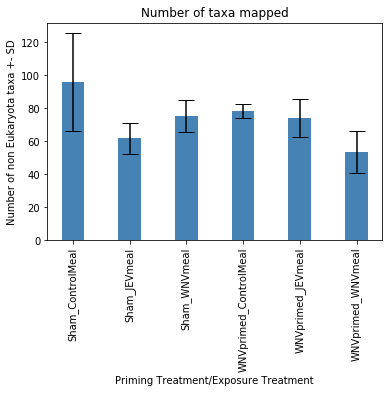

In [239]:
from matplotlib import pyplot as plt
plt.clf()
# fig, ax = plt.subplots(1,2)
ax = plt.gca()
# fig = plt.subplots(1,2)
# ax = fig.add_subplot(111) # Create matplotlib axes
# ax2 = ax.twinx() 
width = 0.4
# grouped_df=x_orig[['ReadsMapped', 'combTreatm']].groupby('combTreatm').agg([np.mean,np.std])
dfCnts.groupby('treatmComb')['numTaxa'].mean().plot(kind='bar',color='SteelBlue',ax=ax, width=width, position=0.5, yerr=dfCnts.groupby('treatmComb')['numTaxa'].std(), capsize=8)
# x_orig.groupby('dfCnts')['numTaxa'].mean().plot(kind='bar',color='DarkRed',ax=ax2, width=width, position=0, yerr=x_orig.groupby('treatmComb')['numTaxa'].std(), capsize=8)
ax.set_xlabel('Priming Treatment/Exposure Treatment')
ax.set_ylabel('Number of non Eukaryota taxa +- SD')
# ax2.set_ylabel('Percent of reads mapped +- SD')
plt.title('Number of taxa mapped')
# plt.legend()
plt.savefig('taxaDiv.png', bbox_inches='tight')
plt.show()
